In [16]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal as mvn

## 2.1 Plot $y = -3x^2 + 72x + 70$.

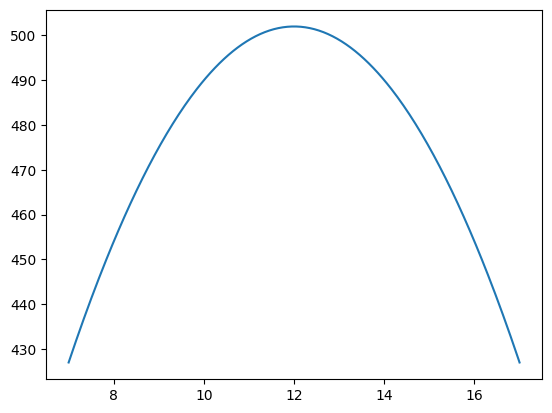

In [18]:
# Your code here
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(7, 17, 300)
y = -3*x**2 + 72*x + 70

plt.plot(x,y)

plt.show()

## 2.3 Plot $f(x_1, x_2)$.

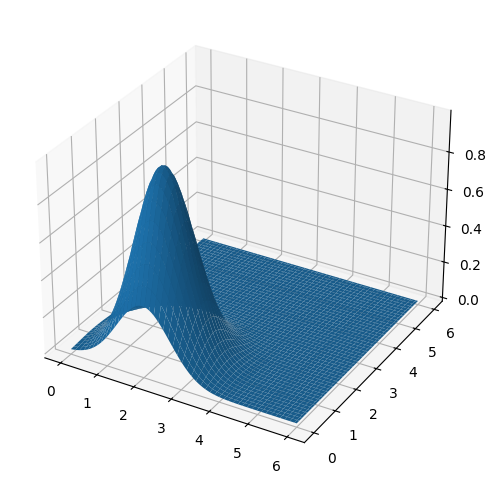

In [44]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 6, 100)
y = np.linspace(0, 6, 100)
x, y = np.meshgrid(x, y)
z = np.exp(-(x-2)**2 - (y-1)**2)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z)

plt.show()

## 3.1(a) Draw from joint distribution of $(S, W)$ and generate bivariate histogram.

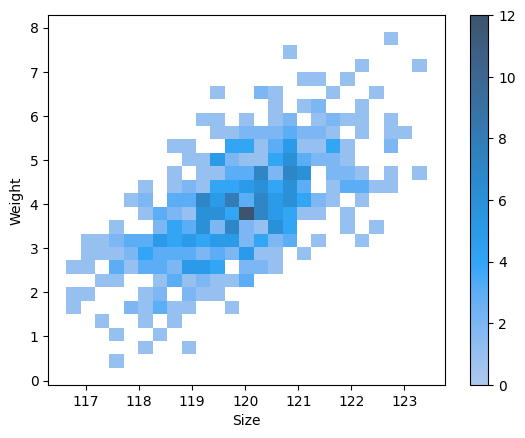

In [54]:
# Your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal as mvn

mean = np.array([120, 4])
cov_matrix = np.array([[1.5, 1], [1, 1.5]])

samples = np.random.multivariate_normal(mean, cov_matrix, size = 500)

dataFrame = pd.DataFrame(samples, columns=['Size', 'Weight'])

sns.histplot(data=dataFrame, x='Size', y='Weight', bins=25, cbar=True)

plt.show()

## 3.2 Plot the joint PDFs at $S=118$ and $S=122$, varying $W$.

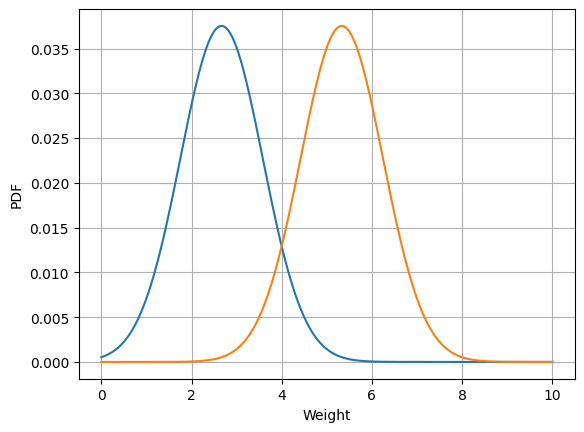

In [64]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

mean = np.array([120, 4])
cov_matrix = np.array([[1.5, 1], [1, 1.5]])

W = np.linspace(0, 10, 1001) 

S1 = 118 
pdf1 = mvn.pdf(np.column_stack((S1 * np.ones_like(W), W)), mean=mean, cov=cov_matrix)
plt.plot(W, pdf1, label='S = 118')

S2 = 122
pdf2 = mvn.pdf(np.column_stack((S2 * np.ones_like(W), W)), mean=mean, cov=cov_matrix)
plt.plot(W, pdf2, label='S = 122')
plt.xlabel('Weight')
plt.ylabel('PDF')

plt.grid(True)

plt.show()

## 3.5(a) Function to simulate draws from $T^{*}$.

In [29]:
# Your code here
import numpy as np

def simulate_proc(sample_num):
    mean = np.array([120, 4])
    cov_matrix = np.array([[1.5, 1], [1, 1.5]])
    
    poisson = 3

    weight_random = np.random.multivariate_normal(mean=mean, cov=cov_matrix, size=sample_num)
    size_random = np.random.multivariate_normal(mean=mean, cov=cov_matrix, size=sample_num)

    hourly_packages = np.random.poisson(poisson, size=sample_num)

    time_array = []

    for i in range(sample_num):
        total_time = 0
        for hour in range(24):
            for package in range(hourly_packages[hour]):
                size = size_random[np.random.choice(sample_num)]
                weight = weight_random[np.random.choice(sample_num)]
                epsilon = np.random.normal(loc=0, scale=5)
                proc_time = 60 + 0.6 * weight + 0.2 * size + epsilon
                total_time += proc_time
        time_array.append(total_time)
    return np.array(time_array)
    

## 3.5(b) Empirically estimate the mean and standard deviation of $T^{*}$ by generating $1000$ samples.

In [32]:
# Your code here
time_array = simulate_proc(1000)

mean = np.mean(time_array)
std_dev = np.std(time_array)

print("Mean of T*: " + str(mean))
print("Std Deviation of T*: " + str(std_dev))

Mean of T*: 7560.978513051649
Std Deviation of T*: 3200.633607901315
